In [83]:
import pandas as pd
import numpy as np
import fileinput

In [84]:
# for line in fileinput.FileInput("DataSet/Dishonest Internet users dataset.txt", inplace=1):
#     line=line.replace(" ",",")
#     print(line)

In [85]:
data = pd.read_csv('DataSet/Dishonest Internet users dataset.txt',header=None,skipinitialspace=True)
data.shape

(322, 5)

In [86]:
data.columns = ['CT','CU','LT','TC','TS']
data.head()

,CT,CU,LT,TC,TS
0,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy
1,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy
2,CT_range_1,CU_range_4,LT_range_4,sport,trustworthy
3,CT_range_2,CU_range_1,LT_range_4,sport,trustworthy
4,CT_range_3,CU_range_1,LT_range_4,sport,trustworthy


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
CT    322 non-null object
CU    322 non-null object
LT    322 non-null object
TC    322 non-null object
TS    322 non-null object
dtypes: object(5)
memory usage: 12.7+ KB


In [88]:
# data.sort_values(['normalized_losses'],ascending=False)
# data = data.reset_index()
# data.head()

In [89]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.CT = enc.fit_transform(data.CT)
data.CU = enc.fit_transform(data.CU)
data.LT = enc.fit_transform(data.LT)
data.TC = enc.fit_transform(data.TC)
data.TS = enc.fit_transform(data.TS)


In [90]:
# np.isfinite(data.all()) 

In [91]:
X= data.iloc[:,:-1]
y=data.TS
# np.isfinite(X).all()

In [92]:
# data.sort_values(['normalized_losses'],ascending=False)
# data.head()

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=10)

In [94]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=3,random_state=10)

model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [95]:
model.labels_

array([0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 1,
       0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1,
       1, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0,
       1, 1, 2, 2, 0], dtype=int32)

In [96]:
c = np.array(['red','blue','green'])

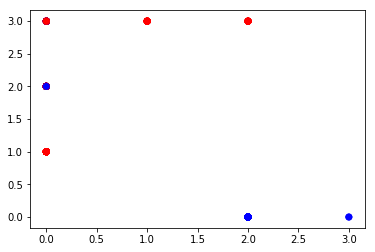

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X.CU,X.TC,color=c[data.TS])

ValueError: 'c' argument has 225 elements, which is not acceptable for use with 'x' with size 322, 'y' with size 322.

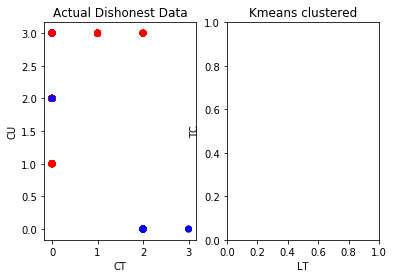

In [98]:
fig = plt.Figure()
fig,ax = plt.subplots(1,2)
ax[0].set_title("Actual Dishonest Data")
ax[1].set_title("Kmeans clustered")
ax[0].set_xlabel("CT")
ax[0].set_ylabel("CU")
ax[1].set_xlabel("LT")
ax[1].set_ylabel("TC")
ax[0].scatter(X.CU,X.TC,color=c[data.TS])
ax[1].scatter(X.CU,X.TC,color=c[model.labels_])